In [2]:
import snap    
import matplotlib
from pylab import mpl
myfont = matplotlib.font_manager.FontProperties(fname='../fonts/simhei.ttf')  
mpl.rcParams['axes.unicode_minus'] = False 

In [7]:
%matplotlib  inline
import pandas as pd
from snap  import * 
import  numpy as np
def getNodeEdge(filename):
    df=pd.read_csv(filename,index_col=0)
    df.drop_duplicates(['cust_a','cust_b'],inplace=True)
    cond=(df.cust_a!=df.cust_b)
    df=df[cond]
    nodes=np.union1d(df.cust_a.unique(),df.cust_b.unique())
    edges=df.values
    return nodes,edges

def getGraph(filename,U=True):
    nodes,edges=getNodeEdge(filename)
    if U:
        G=TUNGraph.New()
    else:
        G=TNGraph.New()
    for node in nodes:
        G.AddNode(node) 
    ## 添加边
    for A,B in edges:
        G.AddEdge(A,B)
    return G
### 入度出度计算
def getInOutDegrees(UGraph=None):
    nodes_stats=[]
    for NI in UGraph.Nodes():
        temp=[NI.GetId(), NI.GetOutDeg(), NI.GetInDeg()]
        nodes_stats.append(temp)
    call_net_nodes=pd.DataFrame(data=nodes_stats,columns=['id','OutDeg','InDeg']).set_index('id')
    return call_net_nodes

In [8]:

app_conatcts=getGraph('chapter1data/app_contacts.csv',U=False)
sms=getGraph('chapter1data/sms_net.csv',U=False)
call_record=getGraph('chapter1data/call_record_net.csv',U=False)

In [5]:
def getSccCnt(UGraph):
    ComponentDist = TIntPrV()
    GetSccSzCnt(UGraph, ComponentDist)
    SccCnt=pd.DataFrame([[comp.GetVal1(), comp.GetVal2()]  for comp   in  ComponentDist],
                        columns=['size','number']).sort_values('number',ascending=False)
    return SccCnt

def getWccCnt(UGraph):
    ComponentDist = TIntPrV()
    GetWccSzCnt(UGraph, ComponentDist)
    WccCnt=pd.DataFrame([[comp.GetVal1(), comp.GetVal2()]  for comp   in  ComponentDist],
                        columns=['size','number']).sort_values('number',ascending=False)
    return WccCnt


### 幂律分布而验证函数
from scipy import stats
def Power_law(df):
    x=np.log(df['size'].values)
    y=np.log(df.number.values)
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
    return slope,p_value,r_value,slope_std_error

def getNodeStats(UGraph):
    stats_df=getInOutDegrees(UGraph)
    Nodes = TIntFltH()
    Edges = TIntPrFltH()
    GetBetweennessCentr(UGraph, Nodes, Edges, 1.0)
    stats_df['BetweennessCentr']=[Nodes[node] for node in Nodes]
    stats_df['DegreeCentr']=[GetDegreeCentr(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['ClosenessCentr']=[GetClosenessCentr(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['FarnessCentr']=[GetFarnessCentr(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['NodeEcc']=[GetNodeEcc(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['NodeClustCf']=[GetNodeClustCf(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['NodeTriads']=[GetNodeTriads(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    return stats_df

In [9]:
sms_scc=getSccCnt(sms)
contact_scc=getSccCnt(app_conatcts)
call_record_scc=getSccCnt(call_record)

In [10]:
sms_wcc=getWccCnt(sms)
contact_wcc=getWccCnt(app_conatcts)
call_record_wcc=getWccCnt(call_record)


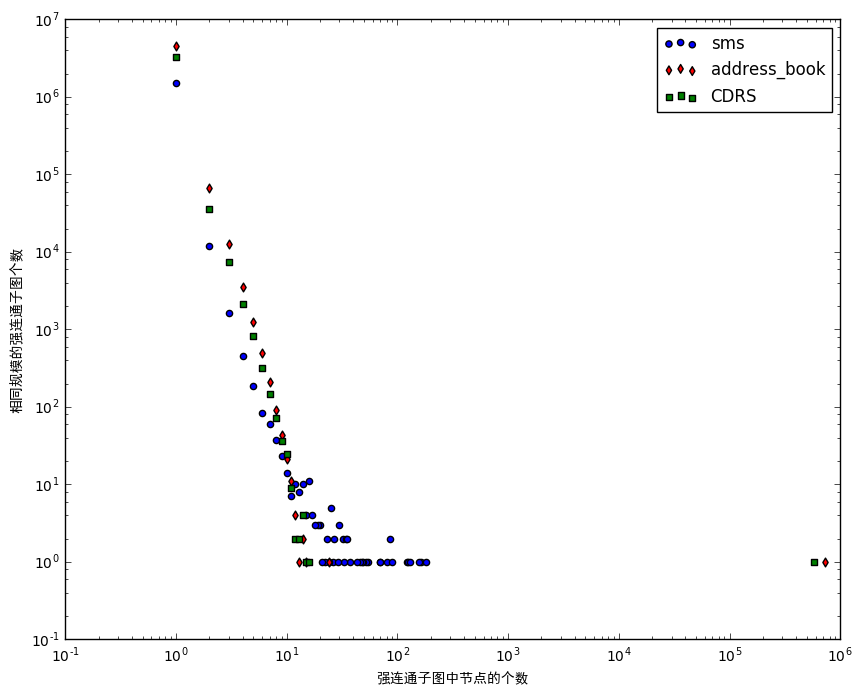

In [11]:
import matplotlib.pylab  as plt
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))
plt.figure(figsize=(10,8))
plt.scatter(sms_scc['size'],sms_scc.number,label='sms')
plt.scatter(contact_scc['size'],contact_scc.number,c='r',marker='d',label='address_book')
plt.scatter(call_record_scc['size'],call_record_scc.number,c='g',marker='s',label='CDRS')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(u'强连通子图中节点的个数',fontproperties=myfont)
plt.ylabel(u'相同规模的强连通子图个数',fontproperties=myfont)
plt.legend(loc=1)

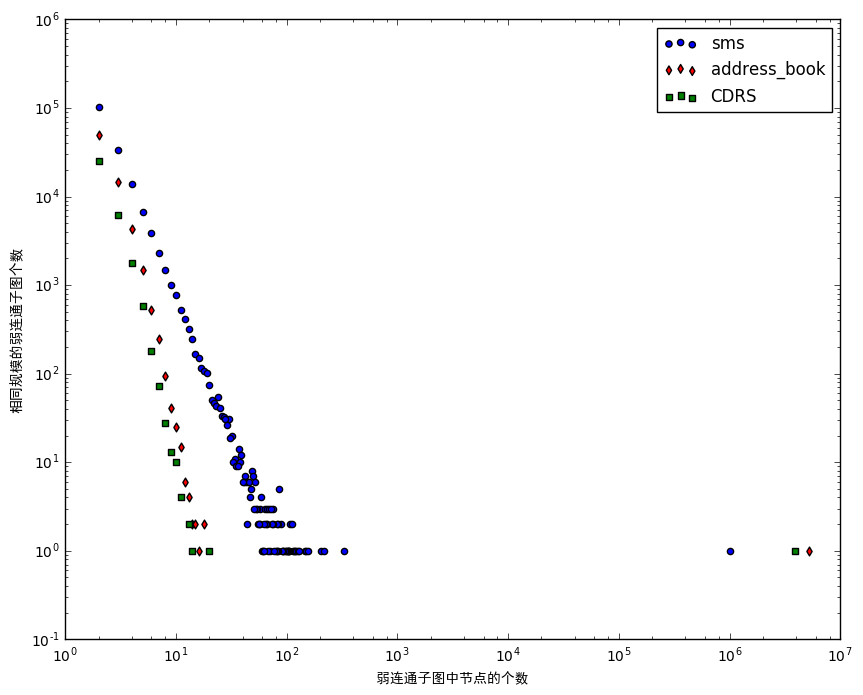

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(sms_wcc['size'],sms_wcc.number,label='sms')
plt.scatter(contact_wcc['size'],contact_wcc.number,c='r',marker='d',label='address_book')
plt.scatter(call_record_wcc['size'],call_record_wcc.number,c='g',marker='s',label='CDRS')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(u'弱连通子图中节点的个数',fontproperties=myfont)
plt.ylabel(u'相同规模的弱连通子图个数',fontproperties=myfont)
plt.legend(loc=1)

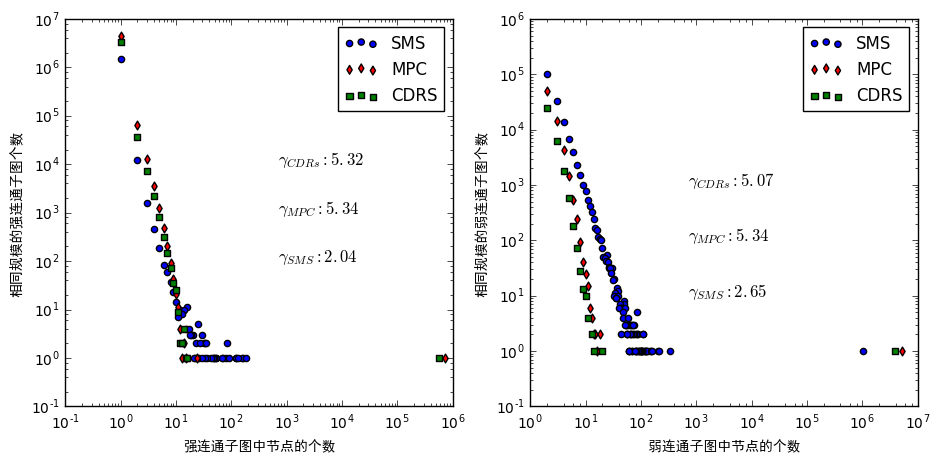

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
axes[0].scatter(sms_scc['size'],sms_scc.number,label='SMS')
axes[0].scatter(contact_scc['size'],contact_scc.number,c='r',marker='d',label='MPC')  #Mobile Phone Contacts
axes[0].scatter(call_record_scc['size'],call_record_scc.number,c='g',marker='s',label='CDRS')
axes[0].set_xlabel(u'强连通子图中节点的个数',fontproperties=myfont)
axes[0].set_ylabel(u'相同规模的强连通子图个数',fontproperties=myfont)
axes[0].text(700,100,'$ \gamma_{SMS}:2.04$',fontsize=12)
axes[0].text(700,1000,'$ \gamma_{MPC}:5.34$',fontsize=12)
axes[0].text(700,10000,'$ \gamma_{CDRs}:5.32$',fontsize=12)

axes[1].scatter(sms_wcc['size'],sms_wcc.number,label='SMS')
axes[1].scatter(contact_wcc['size'],contact_wcc.number,c='r',marker='d',label='MPC')
axes[1].scatter(call_record_wcc['size'],call_record_wcc.number,c='g',marker='s',label='CDRS')
axes[1].set_xlabel(u'弱连通子图中节点的个数',fontproperties=myfont)
axes[1].set_ylabel(u'相同规模的弱连通子图个数',fontproperties=myfont)

axes[1].text(700,10,'$ \gamma_{SMS}:2.65$',fontsize=12)
axes[1].text(700,100,'$ \gamma_{MPC}:5.34$',fontsize=12)
axes[1].text(700,1000,'$ \gamma_{CDRs}:5.07$',fontsize=12)
for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc=1)

In [302]:
usms=ConvertGraph(PUNGraph,sms)   ## 将有向图转换为无向图
uapp_conatcts=ConvertGraph(PUNGraph,app_conatcts)
ucall_record=ConvertGraph(PUNGraph,call_record)

### 1.1  度的分布

In [363]:
sms_degre=getInOutDegrees(sms)
app_conatcts_degree=getInOutDegrees(app_conatcts)
call_record_degree=getInOutDegrees(call_record)

In [364]:
degree_sum = lambda  df:df.sum(axis=1).value_counts()

In [365]:
dsms=degree_sum(sms_degre)
dapp_contacts=degree_sum(app_conatcts_degree)
dcall_record=degree_sum(call_record_degree)

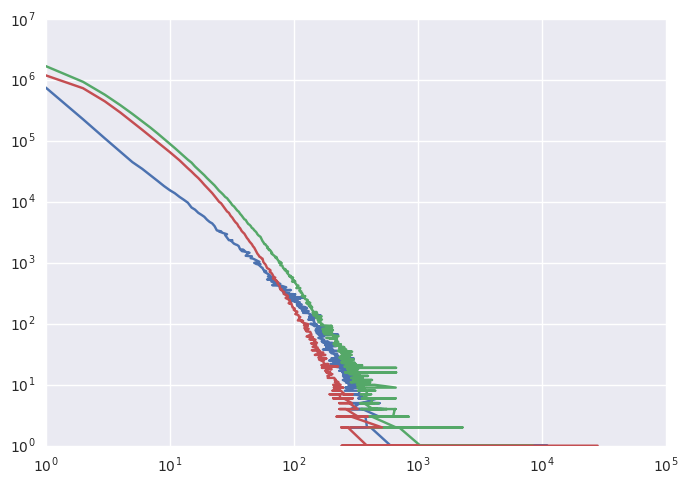

In [366]:
plt.plot(dsms.index,dsms.values)
plt.plot(dapp_contacts.index,dapp_contacts.values)
plt.plot(dcall_record.index,dcall_record.values)
plt.xscale('log')
plt.yscale('log')

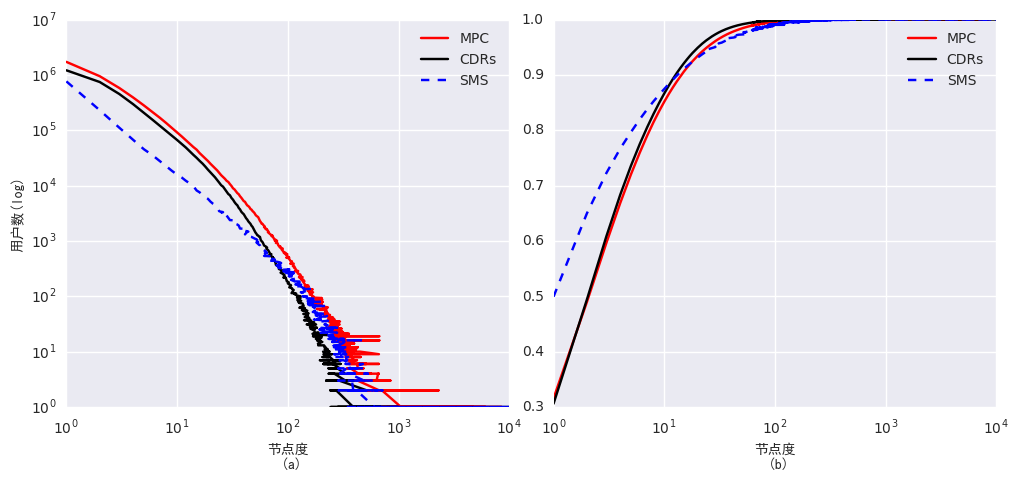

In [369]:
get_rate=lambda  df:df.cumsum()/df.sum()
dsms_rate=get_rate(dsms)
dapp_contacts_rate=get_rate(dapp_contacts)
dcall_record_rate=get_rate(dcall_record)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),sharex=True)



axes[0].plot(dapp_contacts.index,dapp_contacts.values,'-r',label='MPC')
axes[0].plot(dcall_record.index,dcall_record.values,'-k',label='CDRs')
axes[0].plot(dsms.index,dsms.values,'--b',label='SMS')
axes[0].set_yscale('log')
axes[0].set_xscale('log')
# axes[0].set_xlim(0,10000)
# axes[0].set_xscale('log')
axes[0].set_ylabel(u'用户数(log)',fontproperties=myfont)

axes[1].plot(dapp_contacts_rate.index,dapp_contacts_rate.values,'-r',label='MPC')
axes[1].plot(dcall_record_rate.index,dcall_record_rate.values,'-k',label='CDRs')

axes[1].plot(dsms_rate.index,dsms_rate.values,'--b',label='SMS')
# axes[1,0].set_yscale('log')

# axes[0].set_ylim([0,100000])

# axes[1].set_xlabel(u"",fontproperties=myfont)
axes[1].set_xlabel(u"节点度\n (b)",fontproperties=myfont)
axes[0].set_xlabel(u"节点度\n (a)",fontproperties=myfont)

for axl in axes.flatten():
#     ax.set_yscale('log')
    axl.set_xlim([0,10000])
    axl.legend(loc=1)

#     axl.set_xlabel(u"节点度",fontproperties=myfont)
fig.subplots_adjust(wspace=0.1,hspace=0.05)

### 基于最大连通子图的分析

In [379]:
sms_degre['undirect']=sms_degre.sum(axis=1)
app_conatcts_degree['undirect']=app_conatcts_degree.sum(axis=1)
call_record_degree['undirect']=call_record_degree.sum(axis=1)

In [402]:
Get_rate=lambda df,label:(df[label].value_counts()/df[label].sum()).sort_index()

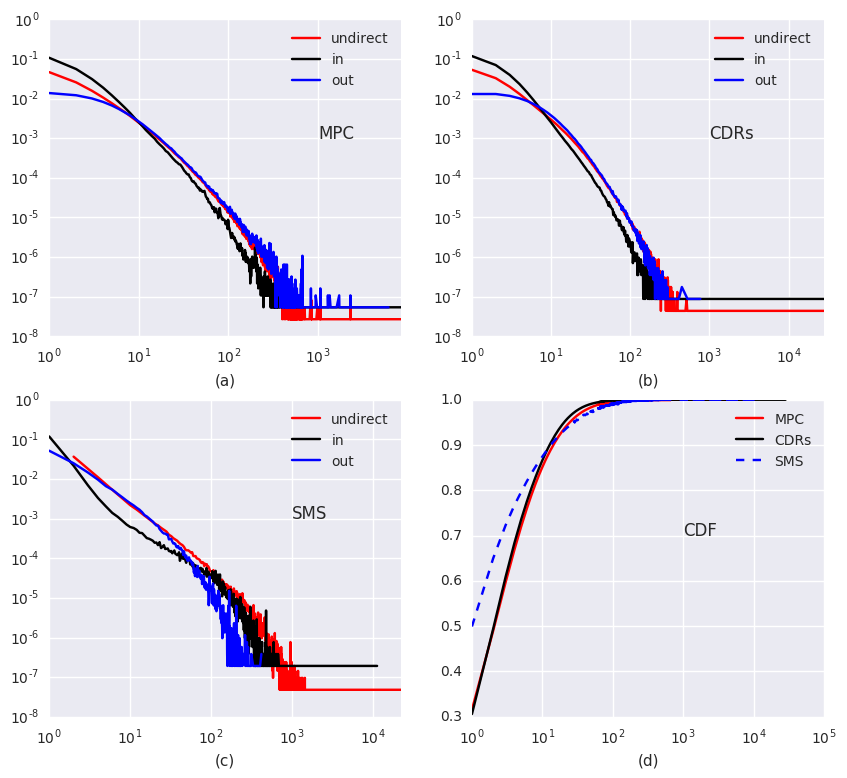

In [468]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9))
GetPlot(app_conatcts_degree,ax=axes[0,0],xlabel='MPC',xx='(a)')
GetPlot(call_record_degree,ax=axes[0,1],xlabel='CDRs',xx='(b)')
GetPlot(sms_degre,ax=axes[1,0],xlabel='SMS',xx='(c)')
axes[1,1].plot(dapp_contacts_rate.index,dapp_contacts_rate.values,'-r',label='MPC')
axes[1,1].plot(dcall_record_rate.index,dcall_record_rate.values,'-k',label='CDRs')

axes[1,1].plot(dsms_rate.index,dsms_rate.values,'--b',label='SMS')
# axes[1,0].set_yscale('log')

# axes[0].set_ylim([0,100000])
# axes[1].set_xlabel(u"",fontproperties=myfont)
axes[1,1].text(1000,0.7,"CDF")
axes[1,1].set_xscale('log')
axes[1,1].set_xlabel('(d)')

# axes[1,1].set_yscale('log')

axes[1,1].legend(loc=1)

In [472]:
from scipy import stats
def Power_law(df):
    x=np.log(df.index.values)
    y=np.log(df.values)
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
    return slope,p_value,r_value,slope_std_error

In [474]:
pl=lambda  df,lable:Power_law(df[lable].value_counts())

In [475]:
pl(sms_degre,'undirect')

(-2.4612253869787337,
 6.14290990672529e-311,
 -0.96431149929180426,
 0.029216385120407196)

In [483]:
pl(call_record_degree,'undirect')

(-2.8918584949723294,
 1.4023004693125725e-219,
 -0.95983501885435107,
 0.042585904604698049)

In [485]:
pl(app_conatcts_degree,'undirect')

(-2.4177333137684771, 0.0, -0.94959719681015498, 0.029723580929898869)

In [490]:
sms_degre.undirect.value_counts()

2       762665
4       229527
6       111435
8        67420
10       45459
12       35243
14       27585
16       22255
18       18370
20       15746
22       13995
24       12196
26       10931
28        9803
30        8160
32        7528
34        6679
36        6203
38        5753
40        5140
42        4730
44        4482
46        4042
48        3437
52        3306
50        3299
54        3107
58        2968
56        2876
60        2377
         ...  
1228         1
1226         1
1220         1
1212         1
1204         1
1200         1
1164         1
1162         1
1148         1
1144         1
1282         1
1310         1
1492         1
1314         1
1466         1
1016         1
1430         1
2446         1
1414         1
1392         1
1390         1
1386         1
1370         1
1360         1
1338         1
1336         1
1328         1
1324         1
1316         1
1438         1
Name: undirect, dtype: int64

In [465]:
def GetPlot(df,ax=None,xlabel=None,xx=None):
    Get_rate(df,'undirect').plot(logx=True,logy=True,label='undirect',ax=ax,color='r')
    Get_rate(df,'InDeg').plot(logx=True,logy=True,label='in',ax=ax,color='k')
    Get_rate(df,'OutDeg').plot(logx=True,logy=True,label='out',ax=ax,color='b')
    ax.legend(loc=1)
    ax.text(1000,0.001,xlabel)
    ax.set_xlabel(xx)
    return ax



In [408]:
app_conatcts_degree.plot?

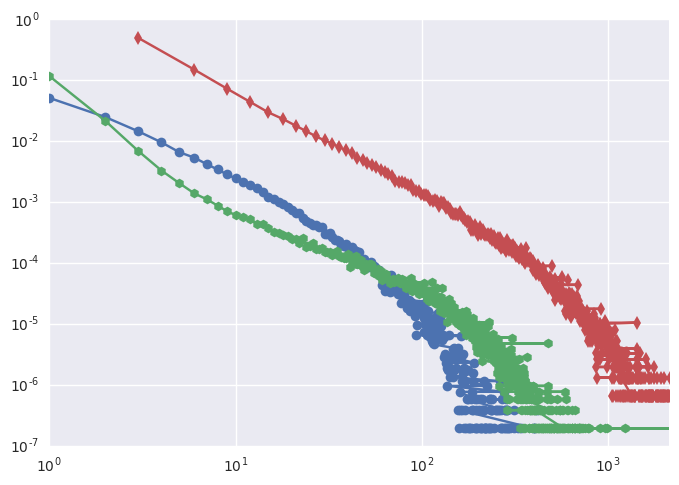

In [416]:
# sms_degre.OutDeg.value_counts().plot(logx=True,logy=True)

(sms_degre.OutDeg.value_counts()/sms_degre.OutDeg.sum()).plot(logx=True,logy=True,marker='o')
(sms_degre.InDeg.value_counts()/sms_degre.InDeg.sum()).plot(logx=True,logy=True,marker='h')
(degree_sum(sms_degre)/degree_sum(sms_degre).sum()).plot(logx=True,logy=True,marker='d')


In [411]:
sms_MxWcc=GetMxWcc_PNGraph(sms)    
app_conatcts_MxWcc=GetMxWcc_PNGraph(app_conatcts)
call_record_MxWcc=GetMxWcc_PNGraph(call_record)

In [511]:
SavePajek(call_record_MxWcc,'chapter1data/call_record_MxWcc.out')

In [510]:
SavePajek(app_conatcts_MxWcc,'chapter1data/app_conatcts_MxWcc.out')

In [516]:
cc=call_record_MxWcc.Nodes()


In [852]:
d=cc.next()
d.GetDeg()
d.GetInDeg()
d.GetOutDeg()
d.GetId()

703

In [854]:
call_record_MxWcc.GetNI(703).GetId()

703

In [493]:
def getNodeStats(UGraph):
    stats_df=getInOutDegrees(UGraph)
    Nodes = TIntFltH()
    Edges = TIntPrFltH()
    GetBetweennessCentr(UGraph, Nodes, Edges, 1.0)
    stats_df['BetweennessCentr']=[Nodes[node] for node in Nodes]
    stats_df['DegreeCentr']=[GetDegreeCentr(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['ClosenessCentr']=[GetClosenessCentr(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['FarnessCentr']=[GetFarnessCentr(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['NodeEcc']=[GetNodeEcc(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['NodeClustCf']=[GetNodeClustCf(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    stats_df['NodeTriads']=[GetNodeTriads(UGraph, NI.GetId()) for NI in UGraph.Nodes()]
    return stats_df

In [498]:
sms_degre.describe()

,OutDeg,InDeg,undirect
count,1.527312e+06,1.527312e+06,1.527312e+06
mean,3.410741e+00,3.410741e+00,1.364296e+01
std,9.679849e+00,1.994216e+01,4.440001e+01
min,0.000000e+00,0.000000e+00,2.000000e+00
25%,0.000000e+00,0.000000e+00,2.000000e+00
50%,1.000000e+00,1.000000e+00,4.000000e+00
75%,2.000000e+00,1.000000e+00,8.000000e+00
max,4.150000e+02,1.111500e+04,2.223000e+04


In [497]:
app_conatcts_degree.describe()

,OutDeg,InDeg,undirect
count,5.435182e+06,5.435182e+06,5.435182e+06
mean,3.407594e+00,3.407594e+00,6.815187e+00
std,1.498613e+01,9.514628e+00,1.840219e+01
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,1.000000e+00
50%,0.000000e+00,2.000000e+00,3.000000e+00
75%,2.000000e+00,3.000000e+00,6.000000e+00
max,6.107000e+03,8.523000e+03,8.523000e+03


In [499]:
call_record_degree.describe()

,OutDeg,InDeg,undirect
count,3.951237e+06,3.951237e+06,3.951237e+06
mean,2.883064e+00,2.883064e+00,5.766128e+00
std,8.070041e+00,1.502234e+01,1.770749e+01
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,1.000000e+00
50%,0.000000e+00,2.000000e+00,3.000000e+00
75%,2.000000e+00,3.000000e+00,6.000000e+00
max,7.690000e+02,2.824400e+04,2.824400e+04
